# SHAP for Residual XGBoost

## 1 Why Explainability Matters

In regulated domains such as **insurance** and **finance**, high predictive accuracy alone is **not sufficient**.  
Models must also be:

- **Interpretable**
- **Auditable**
- **Defensible** to regulators and business stakeholders

Although tree-based models (such as **XGBoost**) are highly powerful, they are often treated as **black boxes**.  
**SHAP (SHapley Additive exPlanations)** provides a principled and theoretically sound framework to explain model predictions at both the global and local levels.

---

## 2️ What SHAP Explains

SHAP assigns each feature a **contribution value** toward an individual prediction.

### Interpretation of SHAP values
- **Positive SHAP value** → increases the predicted premium  
- **Negative SHAP value** → decreases the predicted premium  

### Key properties of SHAP
- **Consistent**: feature importance behaves reliably when models change  
- **Locally accurate**: explanations sum to the model’s prediction  
- **Theoretically grounded**: derived from **cooperative game theory**

These properties make SHAP especially suitable for high-stakes decision systems.

---

## 3️ Prerequisites

This notebook assumes the following are already available:

- A trained **residual XGBoost model** (`xgb_res`)
- Feature matrices:
  - `X_train_int`
  - `X_test_int`

All feature engineering, interaction creation, and column sanitization were completed in:

> **Notebook 01: Core Hybrid Model**


In [9]:
from utils import HybridModel 
import joblib
import utils

model = joblib.load(f"{utils.ARTIFACT_DIR}/hybrid_model.joblib")
lr_int = joblib.load(f"{utils.ARTIFACT_DIR}/lr_int.joblib")
xgb_res = joblib.load(f"{utils.ARTIFACT_DIR}/xgb_res.joblib")

data = joblib.load(f"{utils.ARTIFACT_DIR}/data_splits.joblib")

X_train = data["X_train"]
X_test = data["X_test"]
y_train = data["y_train"]
y_test = data["y_test"]

In [10]:
import shap

In [11]:
explainer = shap.Explainer(xgb_res)
shap_values = explainer(X_test_int)

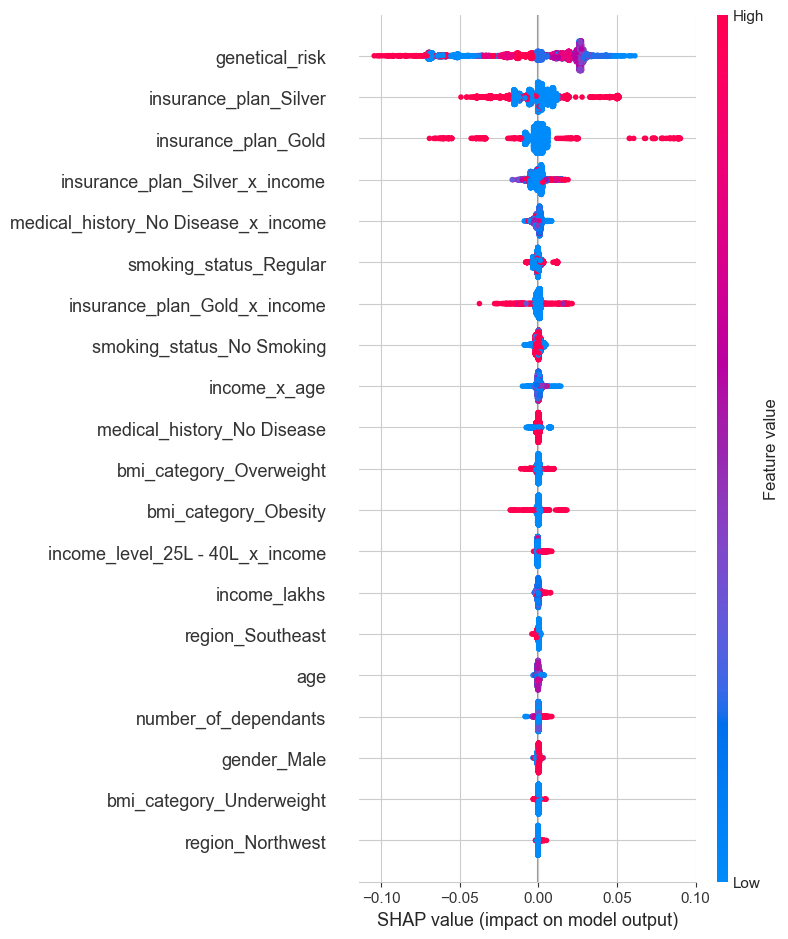

In [12]:
shap.summary_plot(shap_values, X_test_int)

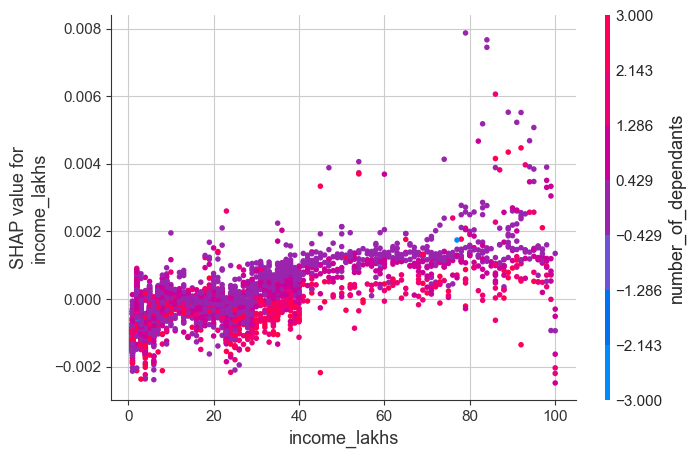

In [13]:
shap.dependence_plot(
    'income_lakhs',
    shap_values.values,
    X_test_int
)

#### This shows:
- how income affects premiums
- where risk spikes

#### I used SHAP to interpret the residual model and ensure that non-linear corrections aligned with domain intuition and regulatory explainability needs.

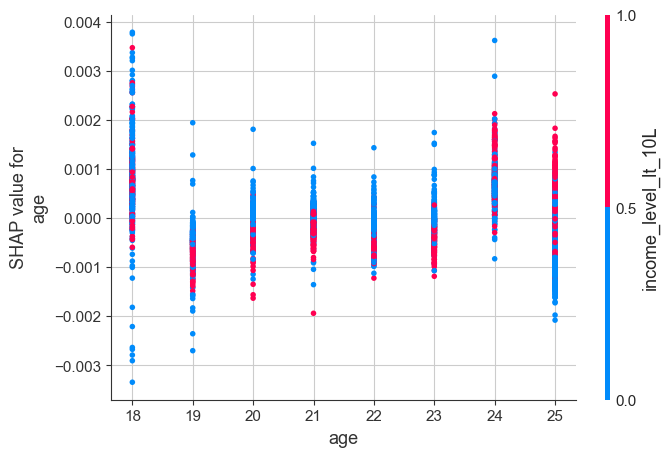

In [14]:
shap.dependence_plot(
'age',
shap_values.values,
X_test_int
)

#### To understand why a specific customer received a high or low premium:

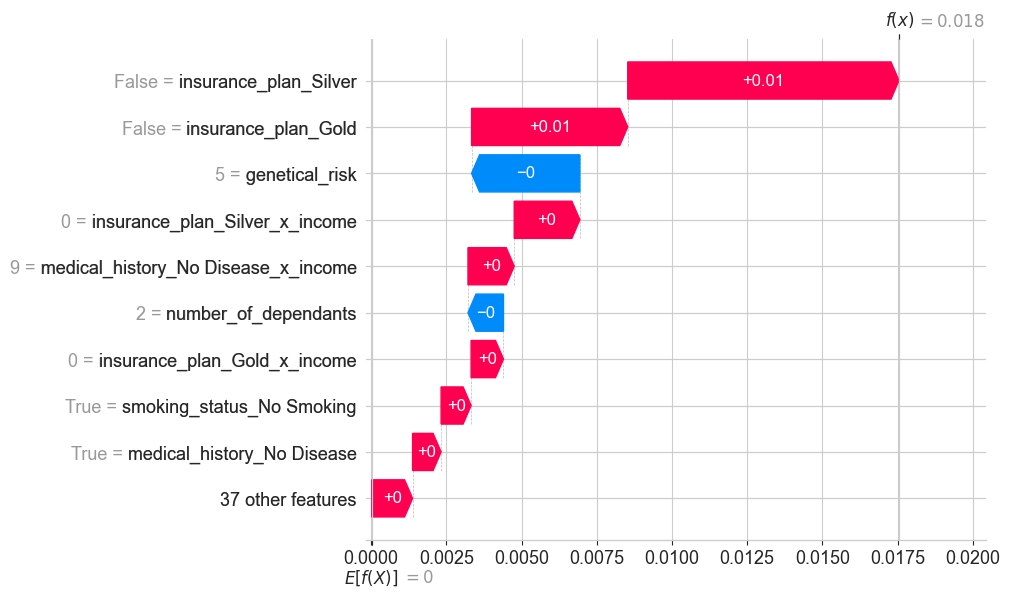

In [15]:
sample_idx = 10
shap.plots.waterfall(shap_values[sample_idx])

## Key Insights from SHAP Analysis

The SHAP analysis of the residual XGBoost model reveals several important patterns in how premiums are adjusted beyond the linear baseline:

- **Income-related features dominate premium adjustments**  
  Income and its interaction terms contribute the most to premium corrections, highlighting income as a primary risk differentiator.

- **Medical history and insurance plan drive non-linear corrections**  
  These features introduce complex, non-linear effects that are not fully captured by linear regression alone.

- **Residual model focuses on edge cases ignored by the linear model**  
  The XGBoost residual learner primarily corrects extreme or atypical cases, improving accuracy where the linear model underperforms.

Overall, SHAP confirms that the hybrid modeling approach effectively separates **global linear trends** from **localized non-linear risk adjustments**.
